In [1]:
## https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
## https://gist.github.com/fchollet
meanloss = []
valloss = []

accuA = []
valaccuA = []

In [2]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
for i in range(5):
    # define cnn model
    def define_model():
        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1, activation='sigmoid'))
        # compile model
        opt = SGD(learning_rate=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # plot diagnostic learning curves
    def summarize_diagnostics(history):
        f = pyplot.figure(figsize=(10,10))
        # plot loss
        ax = f.add_subplot(211)
        ax.title.set_text('Cross Entropy Loss')
        ax.plot(history.history['loss'], color='blue', label='train')
        ax.plot(history.history['val_loss'], color='orange', label='test')
        ax.legend()
        # plot accuracy
        ax2 = f.add_subplot(212)
        ax2.title.set_text('Classification Accuracy')
        ax2.plot(history.history['accuracy'], color='blue', label='train')
        ax2.plot(history.history['val_accuracy'], color='orange', label='test')
        ax2.legend()
        # save plot to file
#         filename = sys.argv[0].split('/')[-1]
        pyplot.savefig('loos128_128_plot.png')
        pyplot.close()

    # run the test harness for evaluating a model
    def run_test_harness():
        # define model
        model = define_model()
        # create data generator
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        # prepare iterators
        train_it = datagen.flow_from_directory('split/train/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        test_it = datagen.flow_from_directory('split/test/',
            class_mode='binary', batch_size=64, target_size=(200, 200))
        # fit model
        history = model.fit(train_it, steps_per_epoch=len(train_it),
            validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
        # evaluate model
        _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
        print(i)
        print('> %.3f' % (acc * 100.0))
        print(f'loss mean = {history.history["loss"]}')
        print("*************************************")        
        print(f'loss valmean = {history.history["val_loss"]}')
        
        valloss.append(history.history["val_loss"])
        meanloss.append(history.history["loss"])
        
        accuA.append(history.history["accuracy"])
        valaccuA.append(history.history["val_accuracy"])
        # learning curves
        summarize_diagnostics(history)

    # entry point, run the test harness
    run_test_harness()
    print("-------------------------------\n")

Found 280 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
0
> 76.667
loss mean = [0.8096017241477966, 0.7268625497817993, 0.6217089891433716, 0.58851557970047, 0.6713667511940002, 0.5806342959403992, 0.6231511831283569, 0.5368527173995972, 0.48982658982276917, 0.4432668387889862, 0.42455610632896423, 0.4091860353946686, 0.38372960686683655, 0.3622482419013977, 0.37744441628456116, 0.3123585879802704, 0.2951364815235138, 0.2766285240650177, 0.2652837038040161, 0.3189699053764343]
*************************************
loss valmean = [0.7409335970878601, 0.6353091597557068, 0.6119211912155151, 0.8701360821723938, 0.7971029877662659, 0.9060971736907959, 0.9508927464485168, 0.6160935759544373, 0.5571515560150146, 0.5509811043739319, 0.5231676697731018, 0.51674884557724, 0.5029036998748779, 0.5918797850608826, 0.5371016263961792, 0.537386953830719, 0.5038859248161316, 0.5085371732711792, 0.5737888216972351, 0.5567376613616943]
-------------------------------

Found 280

In [3]:
import numpy as np
mloss = [float(sum(l))/len(l) for l in zip(*meanloss)]
print(meanloss)

mvloss = [float(sum(l))/len(l) for l in zip(*valloss)]
print(valloss)

[[0.8096017241477966, 0.7268625497817993, 0.6217089891433716, 0.58851557970047, 0.6713667511940002, 0.5806342959403992, 0.6231511831283569, 0.5368527173995972, 0.48982658982276917, 0.4432668387889862, 0.42455610632896423, 0.4091860353946686, 0.38372960686683655, 0.3622482419013977, 0.37744441628456116, 0.3123585879802704, 0.2951364815235138, 0.2766285240650177, 0.2652837038040161, 0.3189699053764343], [1.3672399520874023, 0.9710696339607239, 0.6844728589057922, 0.6651352047920227, 0.645649254322052, 0.6114233136177063, 0.6102083921432495, 0.5414673686027527, 0.5425403118133545, 0.5683771371841431, 0.5563219785690308, 0.6583415269851685, 0.5872422456741333, 0.477324515581131, 0.44474247097969055, 0.4200647175312042, 0.373115211725235, 0.36661672592163086, 0.31420835852622986, 0.320854514837265], [1.0043659210205078, 0.6322898864746094, 0.6532120108604431, 0.5897992253303528, 0.5474444627761841, 0.6135914921760559, 0.5316745638847351, 0.5153302550315857, 0.4822370111942291, 0.45037171244

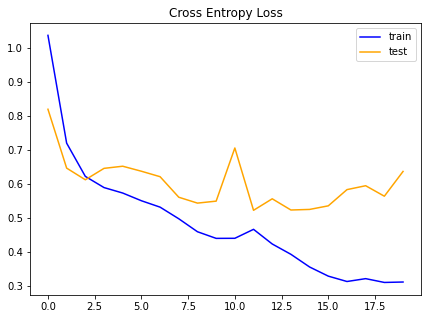

In [4]:
pyplot.figure(figsize=(7,5))
pyplot.title('Cross Entropy Loss')
pyplot.plot(mloss, color='blue', label='train')
pyplot.plot(mvloss, color='orange', label='test')
pyplot.legend()